In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

###1. Find the linear regression equation for mileage vs price.


In [6]:
df = pd.read_csv("car_data.csv")
df.head()

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

In [8]:
# Separate data first
price = df.Price.to_frame()
mileage = df.Mileage.to_frame()

#Fit:put data in, predict:calculate
lregression = linear_model.LinearRegression()
lrfit = lregression.fit(mileage,price)

In [9]:
# Get slope and y-intercept
slope, yintercept = lrfit.coef_[0][0], lrfit.intercept_[0]
eqn = "{:.1f}x + {:.1f}".format(slope, yintercept)
eqn

'-0.2x + 24764.6'

###2. Chart the original data and the equation on the chart.


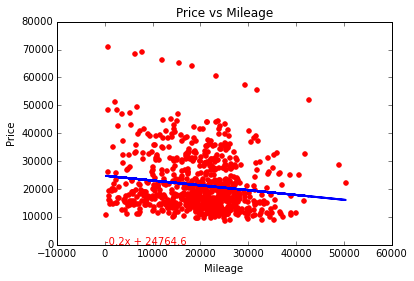

In [11]:
plt.scatter(mileage, price, color='red')
plt.plot(mileage, lrfit.predict(mileage), color='blue', linewidth=2)
plt.text(73, 16.5, eqn, color='red')
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")

###3. Find the equation's $R^2$ score 
(use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [14]:
lrfit.score(mileage, price)

0.020463447323489481

## Tasks, Part 2
###1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [15]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [19]:
features = df[['Mileage', 'Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
price = df[['Price']]

###2. Find the equation's $R^2$ score 
(use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [20]:
regr = linear_model.LinearRegression()
pricefit = regr.fit(features, price)

In [21]:
print("Combined Score is: {:.2f}".format(regr.score(features, price)))

Combined Score is: 0.45


###3. Find the combination of the factors that is the best predictor for price.

In [22]:
print("Individual variance scores")
columns = ['Mileage', 'Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
for column in columns:
    reg = linear_model.LinearRegression()
    ft = reg.fit(df[[column]], price)
    print("{} has score {:.2f}".format(column, reg.score(df[[column]], price)))

Individual variance scores
Mileage has score 0.02
Cylinder has score 0.32
Liter has score 0.31
Doors has score 0.02
Cruise has score 0.19
Sound has score 0.02
Leather has score 0.02


#####Maybe Car liter and cruise would affect the price??

## Tasks, Hard Mode
###1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

###2. Find the best combination of factors to predict price.